## Auteurs

- Adjoua  HOUNDONOUGBO

- Morel Mbedi

M2 MALIA Univ Lyon 2

### Résumé:
l'objectif  de ce notebook est l'exploitation des données textuelles (articles scientifiques)

data : [DBLP-Citation-network V10](https://www.aminer.org/citation)

Points abordés:

1-mise en place d'une moteur de recherche à partir d'une requete en utilisant les technique une matrice documents-termes avec les méthodes TF et TFxIDF

2-modélisation thématique avec LDA, clustring (Kmeas) et visualiation de cesdonnées textuelles.

3-modélisation à l'aide d'un graphe.


4-utilisation d'un modele thématique dit génératif (BERTopic)


In [ ]:
#reglage parametres réginaux
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [ ]:
#connexion  drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#installation libriairies 
#graphe
!pip install node2vec
!pip installsknetwork
!pip install pyvis
!pip install torch_geometric
!pip install networkx
!pip install  scikit-network
#viz
!pip install pyLDAvis
#graphe
!pip install pelote
!pip install ipysigma
!pip install igraph
!pip install  ipysigma
#bertopic
!pip install --upgrade bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0
ERROR: unknown command "installsknetwork" - maybe you meant "install"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.2/616.2 KB 12.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torc

In [ ]:
#!pip install  ipysigma

#Chargement des librairie et des données

In [ ]:
#chargement librairies de base
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import json

In [ ]:
#fonction pour charger les données
def lead_data(url_data):
  """
  url_data: chemin d'acces de données en json
  outpout:df
  """
  liste_citations=[]
  with open(url_data, 'r') as f:
    liste_citations = [json.loads(line) for line in f]
    # on prend les 2 dernière années : 2016 et 2017
    filtered_list = [d for d in liste_citations if "abstract" in d and d.get("year", 0) >= 2016]
  df=pd.DataFrame(filtered_list)
  return df

In [ ]:
#chargement de données
url="/content/drive/MyDrive/MALIA/ANALYSE DATA TEXT/dblp-ref/"
os.chdir(url)
url_data=os.path.join(url,"dblp-ref-0.json")
df=lead_data(url_data)
print(df.shape)
print(f"colonnes: {df.columns}")

(12736, 8)
colonnes: Index(['abstract', 'authors', 'n_citation', 'references', 'title', 'venue',
       'year', 'id'],
      dtype='object')


In [ ]:
#on garde  que 3 colonnes
df=df[["id","title","abstract","authors"]]

In [ ]:
#visualisation de quelques lignes
df.head()

id  \
0  2a68616f-ae27-46aa-8d7b-292a23e3291f   
1  34066529-0350-49aa-bfa4-31561cbf3c9f   
2  348045c5-4d43-4c96-b106-e1038e5d4aaa   
3  82f3e31c-2139-42f9-88ab-2116621eb207   
4  0db3464c-7e35-4bb1-be09-f6f079258e0f   

                                               title  \
0             Width of Points in the Streaming Model   
1  Scalability of using Restricted Boltzmann Mach...   
2  Multi-view Metric Learning for Multi-view Vide...   
3  A New Method for Classification of Datasets fo...   
4  Full-reference image quality assessment by com...   

                                            abstract  \
0  In this article, we show how to compute the wi...   
1  Estimation of Distribution Algorithms (EDAs) r...   
2  Traditional methods on video summarization are...   
3  Decision tree is an important method for both ...   
4  Full-reference image quality assessment (FR-IQ...   

                                             authors  
0                  [Alexandr Andoni, Huy L. Nguyêݱn]  
1         [Malte Probst, Franz Rothlauf, Jörn Grahl]  
2  [Linbo Wang, Xianyong Fang, Yanwen Guo, Yanwei...  
3  [Singh Vijendra, Hem Jyotsana Parashar, Nisha ...  
4                [Ashirbani Saha, Q. M. Jonathan Wu]

In [ ]:
#on verifie si on a les valeurs manquantes
df.isna().sum()

id          0
title       0
abstract    0
authors     0
dtype: int64

In [ ]:
#créatuion du corpus, notre coprus est constitué du résumé de chaque article :"abstract"
corpus=df["abstract"]
corpus = [doc.lower() for doc in corpus]

In [ ]:
#affichons les 3 premiers articles(resumé d'articles)
corpus[:3]

['in this article, we show how to compute the width of a dynamic set of low-dimensional points in the streaming model. in particular, we assume that the stream contains both insertions of points and deletions of points to a set  s , and the goal is to compute the width of the set  s , namely the minimal distance between two parallel hyperplanes sandwiching the point set  s .   our algorithm (1 p e) approximates the width of the set  s  using space polylogarithmic in the size of  s  and the aspect ratio of  s . this is the first such algorithm that supports both insertions and deletions of points to the set  s : previous algorithms for approximating the width of a point set only supported additions [agarwal et al. 2004; chan 2006], or a sliding window [chan and sadjad 2006].   this solves an open question from the “2009 kanpur list” of open problems in data streams, property testing, and related topics [indyk et al. 2011].',
 'estimation of distribution algorithms (edas) require flexibl

In [ ]:
#retrait des ponctuations
import string
ponctuations = list(string.punctuation)
print(ponctuations)
corpus = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in corpus]
print(corpus[:3])

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
['in this article we show how to compute the width of a dynamic set of lowdimensional points in the streaming model in particular we assume that the stream contains both insertions of points and deletions of points to a set  s  and the goal is to compute the width of the set  s  namely the minimal distance between two parallel hyperplanes sandwiching the point set  s    our algorithm 1 p e approximates the width of the set  s  using space polylogarithmic in the size of  s  and the aspect ratio of  s  this is the first such algorithm that supports both insertions and deletions of points to the set  s  previous algorithms for approximating the width of a point set only supported additions agarwal et al 2004 chan 2006 or a sliding window chan and sadjad 2006   this solves an open question from the “2009 kanpur list” of open probl

#TF & TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(stop_words="english",  max_df=1.0, min_df=1, max_features=None)  
tf_vectorizer.fit(corpus)

CountVectorizer(stop_words='english')

In [ ]:
#fonction pour avoir les matrices doc-terms avec les  méthodes TF et TF-IDF
def matrice_docs_termes(corpus,method=None,stop_word=None):
      """
          input
          corpus: notre coprus sous forme d'une liste d'articles
          method:TF ou TD-IDF
          output: calcul la matrice doc termes 
      """
      mc_dt= method(stop_words=stop_word, max_df=1.0, min_df=1, max_features=None)
      X_hp = mc_dt.fit_transform(corpus)
      #features_hp = mc_dt.get_feature_names()
      features_hp = mc_dt.get_feature_names_out()
      return X_hp,features_hp

In [ ]:
#appliquons la fonction  avec  la méthode TF
X_hp,features_hp=matrice_docs_termes(corpus,method=CountVectorizer,stop_word='english')

In [ ]:
print(f"total de tokens: {len(features_hp)}")
print(f" dimensions de la matrice sparse ou docs terme: {X_hp.shape}")


total de tokens: 62629
 dimensions de la matrice sparse ou docs terme: (12736, 62629)


In [ ]:
def top_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids if row[i]>0]
    df = pd.DataFrame(top_feats)
    if len(top_feats) > 0:
        df.columns = ['feature', 'score']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_feats(row, features, top_n)

In [ ]:
print(corpus[6])
top_feats_in_doc(X_hp, features_hp, 6, top_n=30) # pondération des mots du document 6 

purpose – the purpose of this paper is to explore how postponement is applied in retailing and how such application is connected to logistics flexibility designmethodologyapproach – an overview of the established typological classifications of postponement and logistics flexibility is presented followed by empirical results from three case studies of retailers of electronics furniture and grocery in sweden the study relies on primary qualitative data gathered on the retailers as well as secondary material on some suppliers including logistics providers for further insight findings – the results of the study show that retailers have different practices when it comes to postponement and speculation however there is a growing tendency toward postponement among retailers by exploring new means of applying postponement the results reveal that retailers that have higher application of postponement seem to be more flexible in their logistics operations research limitationsimplications – the p

feature  score
0      postponement      6
1         retailers      5
2         logistics      4
3           results      3
4       application      2
5             study      2
6           purpose      2
7             paper      2
8       flexibility      2
9         suppliers      1
10        exploring      1
11      electronics      1
12          growing      1
13         material      1
14         overview      1
15             data      1
16        providers      1
17        retailing      1
18         applying      1
19        empirical      1
20            means      1
21         tendency      1
22           sweden      1
23           relies      1
24      typological      1
25         followed      1
26      speculation      1
27  classifications      1
28           reveal      1
29           higher      1

In [ ]:
print(corpus[6])
print(corpus[50])
top_feats_in_doc(X_hp, features_hp, 6, top_n=30) # pondération des mots du document 6 
top_feats_in_doc(X_hp, features_hp, 50, top_n=30)

purpose – the purpose of this paper is to explore how postponement is applied in retailing and how such application is connected to logistics flexibility designmethodologyapproach – an overview of the established typological classifications of postponement and logistics flexibility is presented followed by empirical results from three case studies of retailers of electronics furniture and grocery in sweden the study relies on primary qualitative data gathered on the retailers as well as secondary material on some suppliers including logistics providers for further insight findings – the results of the study show that retailers have different practices when it comes to postponement and speculation however there is a growing tendency toward postponement among retailers by exploring new means of applying postponement the results reveal that retailers that have higher application of postponement seem to be more flexible in their logistics operations research limitationsimplications – the p

feature  score
0                 vrp      4
1        multivariate      4
2              equity      3
3          stochastic      3
4                 new      2
5              models      2
6            variance      2
7             premium      2
8             indices      2
9              assets      2
10         volatility      2
11          processes      2
12             refers      1
13            wishart      1
14             hawkes      1
15           stylized      1
16          contagion      1
17            propose      1
18        incorporate      1
19              facts      1
20           includes      1
21         identifies      1
22  ornsteinuhlenbeck      1
23        alternative      1
24            explain      1
25            setting      1
26         individual      1
27              model      1
28            holding      1
29             shocks      1

In [ ]:
def get_top_words(X_hp,top_n=25):
    D = X_hp.toarray()

    n_docs, n_terms = D.shape

    #tf_means = np.mean(D, axis=0)
    tf_sum = np.sum(D, axis=0)
    tff = top_feats(tf_sum, features_hp,top_n=top_n)
    return tff

In [ ]:
#regardons le top words dans le corpus a  avec la methdeo TF
tff=get_top_words(X_hp)
tff

feature  score
0      proposed   7300
1         paper   7152
2          data   6960
3       results   6128
4        method   6017
5         model   5927
6     algorithm   5531
7       problem   5515
8         based   5250
9         using   4992
10  performance   4213
11     approach   3984
12         time   3786
13         used   3740
14          new   3692
15  information   3652
16      network   3600
17    different   3345
18       number   3336
19        study   3179
20     analysis   3173
21      methods   3133
22      systems   2964
23          set   2869
24      propose   2642

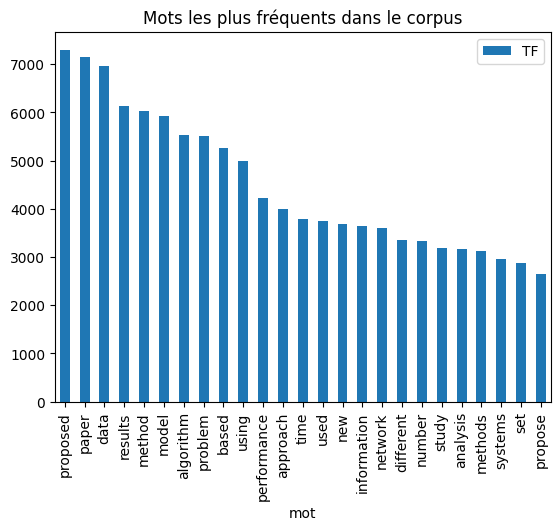

In [ ]:
#graphique en barre des top mots
def show_top_words(tff,method='TF'):
    """
    X_hp: matrice sparse
    """
    top_f = tff.feature
    top_v = tff.score
    df = pd.DataFrame({'mot':top_f,method:top_v})
    df.plot.bar(x='mot', y=method, rot=90, title ="Mots les plus fréquents dans le corpus")

#appliquons la focntion
show_top_words(tff,method='TF')

In [ ]:
#construison la mesure de similarité
import math
# fonction calculant le cosinus entre deux vecteurs
def cosinus(i, j):
    num = np.dot(i, j)
    den = math.sqrt(sum(i*i))*math.sqrt(sum(j*j))
    if (den>0):    
        return (num/den)
    else:
        return 0

# fonction calculant la distance euclidienne entre deux vecteurs de mots
def distance_euclidienne(w1,w2):
    return np.linalg.norm(w1-w2)

In [ ]:
#construisons la requette de recherche
query = ['graph','machine']
#features_hp = pd.DataFrame(features_hp)
indices = [list(features_hp).index(q) for q in query if q in features_hp]
  # index permet de trouver le numéro correspondant aux mots dans le vocabulaire
print(indices)

[24226, 33015]


In [ ]:
features_hp

array(['00', '000', '0000', ..., 'ﬁrst', 'ﬂexibility', 'ﬂexible'],
      dtype=object)

In [ ]:
def  search_terms(query,X_hp,features_hp,similarity=cosinus):
    """
    input: 
         -query:  liste de mots à rechcerher
         -X_hp: matrice sparse
         -features_hp: liste des mots qui se trouvent dans la matrice sparse
    output:df qui contient la mesure de silimarité choisie entre la requet et chaque mot.  classer par ordre de similarity decroissant
    """
    D = X_hp.toarray()
    n_docs, n_terms = D.shape
    # index permet de trouver le numéro correspondant aux mots dans le vocabulaire
    indexes = [list(features_hp).index(q) for q in query if q in features_hp]
        #construis un vecteur de la meme  la taille que le  vocabulaire "tf_vectorizer"
    query_vec = np.zeros(n_terms)
    query_vec[indexes] = 1

    # fonction qui crée un dictionnaire associant le cosinus à chaque document par rapport aau vecteur requete
    # puis le trie de manière décroissante
    cc = {i: similarity(D[i, :], query_vec) for i in range(n_docs)}
    cc = sorted(cc.items(), key=lambda x: x[1], reverse=True)
    return cc

In [ ]:
#requete pour TF
query = ['graph', 'learning']
resultat_TF=search_terms(query,X_hp,features_hp,similarity=cosinus)

In [ ]:
def get_top_docs_similarity(corpus,result,nb_top_docs = 10):
    top_docs = [r for (r,v) in result[0:nb_top_docs]]
    #afficaheg du des document correspond au  top_n
    #print("methode: TF")
    print(top_docs)
    for i, td in zip(range(nb_top_docs), top_docs):
           print("%s (%s): %s" % (i+1, td, corpus[td]))

In [ ]:
# on regarde les top 10 des articles les plus propable de la requete 
get_top_docs_similarity(corpus,resultat_TF,nb_top_docs = 10) 

[5935, 7396, 5898, 6337, 3909, 1858, 1284, 9180, 8360, 5458]
1 (5935): the construction of a meaningful graph plays a crucial role in the success of many graphbased representations and algorithms for handling structured data especially in the emerging field of graph signal processing however a meaningful graph is not always readily available from the data nor easy to define depending on the application domain in particular it is often desirable in graph signal processing applications that a graph is chosen such that the data admit certain regularity or smoothness on the graph in this paper we address the problem of learning graph laplacians which is equivalent to learning graph topologies such that the input data form graph signals with smooth variations on the resulting topology to this end we adopt a factor analysis model for the graph signals and impose a gaussian probabilistic prior on the latent variables that control these signals we show that the gaussian prior leads to an effic

Comparaison  TF vs TF-IDF 

In [ ]:
#matrice sparse avec la methode TF_IDF
from sklearn.feature_extraction.text import TfidfVectorizer
X_hp,features_hp=matrice_docs_termes(corpus,method=TfidfVectorizer,stop_word='english')

In [ ]:
#regardons le top words dans le corpus a  avec la methdeo TF_IDF
tf_idff=get_top_words(X_hp,top_n=50)
#tf_idff

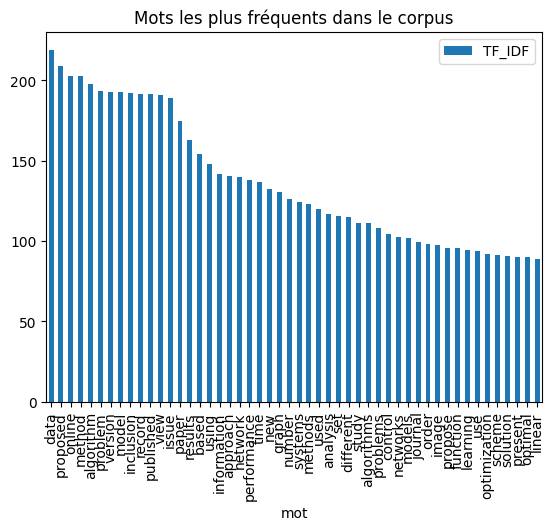

In [ ]:
#visualisation
show_top_words(tf_idff,method='TF_IDF')

In [ ]:
#resultat TF_IDF
query = ['graph', 'learning']
resultat_TF_Idf=search_terms(query,X_hp,features_hp,similarity=cosinus) #mesure de similarity "cosinus"

In [ ]:
#help(features_hp)

In [ ]:
#regardons les top 10 documents  TF_IDTF
get_top_docs_similarity(corpus,resultat_TF_Idf,nb_top_docs = 10)

[5935, 7396, 6337, 1858, 5898, 1284, 9180, 11322, 8360, 6560]
1 (5935): the construction of a meaningful graph plays a crucial role in the success of many graphbased representations and algorithms for handling structured data especially in the emerging field of graph signal processing however a meaningful graph is not always readily available from the data nor easy to define depending on the application domain in particular it is often desirable in graph signal processing applications that a graph is chosen such that the data admit certain regularity or smoothness on the graph in this paper we address the problem of learning graph laplacians which is equivalent to learning graph topologies such that the input data form graph signals with smooth variations on the resulting topology to this end we adopt a factor analysis model for the graph signals and impose a gaussian probabilistic prior on the latent variables that control these signals we show that the gaussian prior leads to an effi

In [ ]:
# affichage des articles en commun entre les deux méthodes pour la requete query=["machine","learning"]
def articles_comun_with_TF_TF_IDF(resultat_TF,resultat_TF_Idf,nb_top_docs=10):
    Tf_idf_method=[r for (r,v) in resultat_TF_Idf[0:nb_top_docs]]
    TF_method=[r for (r,v) in resultat_TF[0:nb_top_docs]]
    index_commun=[ index for index in Tf_idf_method if index in TF_method]
    print("TF_IDF: ",Tf_idf_method)
    print("TF: ",TF_method)
    print(f"nbrs docs en coummuns : {len(index_commun)}")
    print(f"prop docs en coummuns : {100*(len(index_commun)/nb_top_docs)} %")

In [ ]:
#artcile en comun entre les 2 méthodes de calculs de matrices document-terms TF , TF-IDF
articles_comun_with_TF_TF_IDF(resultat_TF,resultat_TF_Idf,nb_top_docs=10)

TF_IDF:  [5935, 7396, 6337, 1858, 5898, 1284, 9180, 11322, 8360, 6560]
TF:  [5935, 7396, 5898, 6337, 3909, 1858, 1284, 9180, 8360, 5458]
nbrs docs en coummuns : 8
prop docs en coummuns : 80.0 %


### TP2

#Visualisation et modélisation thématique

In [ ]:
#partie 2
#chargement des libraries
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from gensim import corpora, models
#from gensim.models import  Word2Vec
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib import cm 
import os
#spacy
import spacy
from nltk.corpus import stopwords

#viz
import pyLDAvis
import pyLDAvis.gensim

preparation de données

In [ ]:
def gen_word(textes):
  final=[]
  for text in textes:
    new=gensim.utils.simple_preprocess(text,deacc=True)
    final.append(new)
    return final

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#stopword avec gesim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
corpus_stop_words = [remove_stopwords(" ".join(simple_preprocess(doc))) for doc in corpus]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_words=gen_word(corpus_stop_words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
id2word=corpora.Dictionary(data_words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#construire notre corpus de documenst(artiles)
#representation de documents
articles=[]
for text in data_words:
  new=id2word.doc2bow(text)
  articles.append(new)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#listes des  resumés des articles 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# on construit le corpus
articles_set=df["abstract"]
data_words = list(sent_to_words(articles_set))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#dictionnaire et corpus
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# on retire les mots-outils
data_words_nostops = remove_stopwords(data_words)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# show_topics permet d'afficher les mots directement
#ldamodel.show_topics(num_topics=ntopics,formatted=False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#visualisation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")
vectorizer.fit(df["abstract"])
X = vectorizer.transform(df["abstract"])
X = X.toarray()
features = vectorizer.get_feature_names_out()

(num_doc, num_f) = X.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# les "labels" du nuage sont les mots
cloud_labels = features
# les poids correspondent à la somme des TF-IDF selon les lignes de la matrice
cloud_weights = np.sum(X, axis=0)
# on construit un dictionnaire qui associe chaque label (mot) au poids correspondant (TF-IDF total)
dictionary = dict(zip(cloud_labels, cloud_weights)) # zip "colle" le vecteur des labels au vecteur des poids
# on trie par ordre décroissant
sorted_by_value = sorted(dictionary.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_by_value[0:50])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('based', 8226), ('proposed', 7413), ('data', 7261), ('paper', 7183), ('results', 6192), ('model', 6179), ('method', 6074), ('problem', 5605), ('algorithm', 5589), ('time', 5483), ('using', 5012), ('performance', 4315), ('approach', 4011), ('used', 3783), ('information', 3764), ('network', 3752), ('new', 3708), ('different', 3357), ('number', 3357), ('analysis', 3222), ('study', 3201), ('methods', 3166), ('systems', 3075), ('set', 3016), ('order', 2891), ('propose', 2649), ('algorithms', 2630), ('use', 2561), ('high', 2528), ('graph', 2468), ('models', 2440), ('problems', 2398), ('networks', 2386), ('present', 2239), ('control', 2201), ('learning', 2154), ('image', 2146), ('function', 2106), ('optimal', 2077), ('large', 2075), ('case', 2066), ('real', 2054), ('state', 2050), ('process', 2047), ('linear', 2027), ('scheme', 1978), ('optimization', 1938), ('framework', 1898), ('given', 1889), ('solution', 1879)]


In [ ]:
from wordcloud import WordCloud

limit = 50
fontcolor='#fafafa'
bgcolor = '#000000'

wordcloud = WordCloud(
    max_words=limit,
    background_color=bgcolor,
).fit_words(dictionary) # cette fois, on donne au générateur le dictionnaire construit par nos soins

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


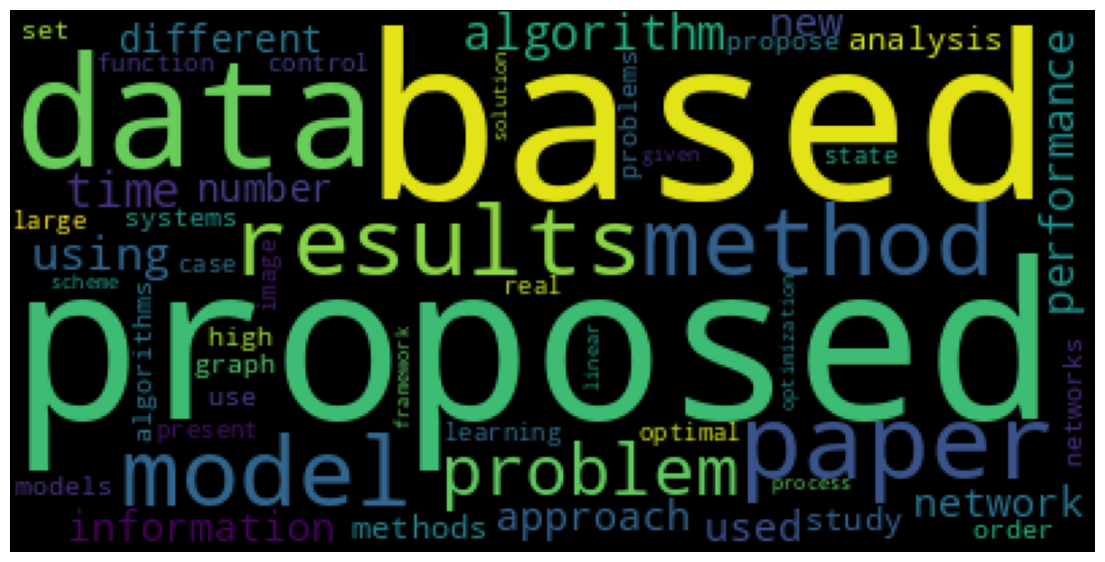

In [ ]:
import random
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

title = "Nuage de mots pour Dune"

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#plongement avec Doc2Vec


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.5, min_df=3, max_features=1000)
tfidf_vectorizer.fit(df["abstract"])
D = tfidf_vectorizer.transform(df["abstract"])

features = tfidf_vectorizer.get_feature_names_out()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# on rajoute une taille minimale dès à présent
min_docs = 4

tagged_docs = []
nbw_docs = []
for i, list_tokens in enumerate(tfidf_vectorizer.inverse_transform(D)):
    nbw = len(list_tokens)
    nbw_docs.append(nbw)
    if nbw > min_docs:        
        tagged_docs.append(TaggedDocument(words=list_tokens, tags=[str(i+1)]))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(tagged_docs)
tagged_docs[0:4]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[TaggedDocument(words=array(['using', 'testing', 'space', 'size', 'set', 'related', 'ratio',
        'question', 'property', 'problems', 'previous', 'points', 'point',
        'particular', 'parallel', 'open', 'model', 'minimal', 'low',
        'goal', 'et', 'dynamic', 'distance', 'dimensional', 'data',
        'contains', 'compute', 'article', 'algorithms', 'algorithm', 'al'],
       dtype='<U15'), tags=['1']),
 TaggedDocument(words=array(['using', 'uses', 'tree', 'training', 'times', 'time', 'terms',
        'state', 'solving', 'small', 'size', 'single', 'scale', 'results',
        'requires', 'require', 'properties', 'problems', 'problem',
        'probability', 'potential', 'population', 'performance',
        'particular', 'outperforms', 'optimization', 'objective', 'number',
        'neural', 'networks', 'models', 'model', 'larger', 'large', 'good',
        'evaluate', 'estimation', 'efficiently', 'distribution',
        'difficult', 'computational', 'complexity', 'complex', 'com

In [ ]:
dim_d2v = 10
model_doc2vec = Doc2Vec(tagged_docs, vector_size=dim_d2v, window = 5)
model_doc2vec.train(tagged_docs, total_examples = len(tagged_docs), epochs = 1000)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#rechcehe
from nltk.tokenize import word_tokenize
nltk.download('punkt')
test_doc = word_tokenize("graph learning".lower())
test_doc_vector = model_doc2vec.infer_vector(test_doc)
res = model_doc2vec.dv.most_similar(positive = [test_doc_vector])
print(res)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('6894', 0.9223666191101074), ('4051', 0.9066085815429688), ('9442', 0.9001034498214722), ('9367', 0.895864725112915), ('4129', 0.8951404690742493), ('9872', 0.8890361785888672), ('12342', 0.8881535530090332), ('4099', 0.8800054788589478), ('1680', 0.8770452737808228), ('667', 0.8767598271369934)]


In [ ]:
#affichage du contenu   obtenus des ID des articles  pour notre requete
for i, s in res:
    ind_doc = int(i)
    print("%s (%s): %s" % (i, s, df["abstract"][ind_doc-1]))

6894 (0.9223666191101074): DNA sequencing is the process of determining the exact order of the nucleotide bases of an individual's genome in order to catalogue sequence variation and understand its biological implications. Whole-genome sequencing techniques produce masses of data in the form of short sequences known as reads. Assembling these reads into a whole genome constitutes a major algorithmic challenge. Most assembly algorithms utilise de Bruijn graphs constructed from reads for this purpose. A critical step of these algorithms is to detect typical motif structures in the graph caused by sequencing errors and genome repeats, and filter them out; one such complex subgraph class is a so-called superbubble. In this paper, we propose an O ( n + m ) -time algorithm to detect all superbubbles in a directed acyclic graph with n vertices and m (directed) edges, improving the best-known O ( m log ? m ) -time algorithm by Sung et al.
4051 (0.9066085815429688): Multilayer networks are a us

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(len(model_doc2vec.dv))
type(model_doc2vec.dv)
set_tags = list([t.tags[0] for t in tagged_docs])
nb_docs_small = len(set_tags)
print(nb_docs_small)

12709
12709


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#on récupère un tableau de plongement pour les sauvegarder
doc_vec_doc2vec = np.zeros(shape=(nb_docs_small, dim_d2v))
i = 0
for t in set_tags:    
    doc_vec_doc2vec[i] = model_doc2vec.dv[t]
    i += 1
doc_vec_doc2vec.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(12709, 10)

In [ ]:
#savégarde
doc_ids_small = [int(t) for t in set_tags]
nbw_docs_small = [nbw_docs[i-1] for i in doc_ids_small]

col_p = np.array(nbw_docs_small).reshape(nb_docs_small,1)
col_ids = np.array(doc_ids_small).reshape(nb_docs_small,1)
data_to_save = np.hstack([doc_vec_doc2vec, col_p, col_ids])
np.savetxt('vec_doc_doc2vec.csv', data_to_save, delimiter='\t')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#clustering et LDA avec doc2vec

#clustering 

In [ ]:
#clustering avec la matrice obtenu en  TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorisation des données
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)

# Clustering avec l'algorithme k-means
kmeans = KMeans(n_clusters=10, random_state=0).fit(tfidf)

# Affichage des résultats
data=df.copy()
data['cluster'] = kmeans.labels_
print(data.groupby('cluster').size().reset_index(name='counts'))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   cluster  counts
0        0    1094
1        1     503
2        2     945
3        3     665
4        4    5141
5        5    1051
6        6    1207
7        7    1478
8        8     474
9        9     178


In [ ]:
data.head(3)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id  \
0  2a68616f-ae27-46aa-8d7b-292a23e3291f   
1  34066529-0350-49aa-bfa4-31561cbf3c9f   
2  348045c5-4d43-4c96-b106-e1038e5d4aaa   

                                               title  \
0             Width of Points in the Streaming Model   
1  Scalability of using Restricted Boltzmann Mach...   
2  Multi-view Metric Learning for Multi-view Vide...   

                                            abstract  \
0  In this article, we show how to compute the wi...   
1  Estimation of Distribution Algorithms (EDAs) r...   
2  Traditional methods on video summarization are...   

                                             authors  cluster  
0                  [Alexandr Andoni, Huy L. Nguyêݱn]        4  
1         [Malte Probst, Franz Rothlauf, Jörn Grahl]        0  
2  [Linbo Wang, Xianyong Fang, Yanwen Guo, Yanwei...        5

In [ ]:
# #clustering avec la matrice obtenu en  doc2vec
km_10_doc2vec = KMeans(n_clusters=10, random_state=0).fit(doc_vec_doc2vec)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#clustering et sauvegarde
doc_ids_small = [int(t) for t in set_tags]
nbw_docs_small = [nbw_docs[i-1] for i in doc_ids_small]
clu_lab_small = np.array(km_10_doc2vec.labels_).reshape(nb_docs_small,1)

col_p = np.array(nbw_docs_small).reshape(nb_docs_small,1)
col_ids = np.array(doc_ids_small).reshape(nb_docs_small,1)
data_to_save = np.hstack([doc_vec_doc2vec, col_p, col_ids, clu_lab_small])
np.savetxt('vec_doc_doc2vec_clu10.csv', data_to_save, delimiter='\t')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#visualisation docvec
data = np.loadtxt('vec_doc_doc2vec_clu10.csv', delimiter='\t')
dim = data.shape[1]-3 # les deux dernières colonnes sont utilisées pour autre chose
doc_vec = data[:, :dim]
id_docs = data[:, dim+1]
clu_ids = data[:, dim+2]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## modele LDA

In [ ]:
#corpus des articles
# création du dictionnaire
data_words_nostops = remove_stopwords(data_words)
dico = corpora.Dictionary(data_words_nostops)
# ce qui permet par ex. de filtrer le vocabulaire
dico.filter_extremes(no_below=10)
# Create Corpus
texts = data_words_nostops

# matrice Term Document Frequency
corpus_articles = [dico.doc2bow(text) for text in texts]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ntopics=10
ldamodel = LdaModel(corpus_articles, num_topics=ntopics, id2word = dico,
                                           passes=100, random_state=100, per_word_topics=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Si on souhaite obtenir p(z|d), il faut réexécuter le modèle sur les données (par ex., le corpus).

Les procédures suivantes fournissent plusieurs "vues" intéressantes sur le modèle. Elles viennent du site machinelearningplus.com :

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

Tout d'abord, on souhaite un tableau qui liste la thématique majoritaire pour chaque document, accompagnée par ses mots les plus probables.

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    i=0
    for i, row in enumerate(ldamodel[corpus]):
        #print(row[0])            
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        #print(row)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus_articles, texts=texts)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-71-9b95f7123b0c>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-71-9b95f7123b0c>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [ ]:
# Formatage
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               3              0.7220   
1            1               7              0.5321   
2            2               5              0.7550   
3            3               5              0.5855   
4            4               5              0.8176   
5            5               3              0.8778   
6            6               6              0.6677   
7            7               4              0.2320   
8            8               8              0.4330   
9            9               3              0.5030   

                                            Keywords  \
0  graph, number, graphs, set, show, two, paper, ...   
1  problem, algorithm, optimization, problems, me...   
2  data, based, method, proposed, image, learning...   
3  data, based, method, proposed, image, learning...   
4  data, based, method, proposed, image, learning...   
5  graph, number, graphs, set, show, two, paper, ...   
6  study, research, information, social, use, ana...   
7  control, system, systems, online, view, issue,...   
8  method, using, proposed, based, high, used, re...   
9  graph, number, graphs, set, show, two, paper, ...   

                                                Text  
0  [article, show, compute, width, dynamic, set, ...  
1  [estimation, distribution, algorithms, edas, r...  
2  [traditional, methods, video, summarization, d...  
3  [decision, tree, important, method, induction,...  
4  [full, reference, image, quality, assessment, ...  
5  [fomin, kirillov, algebra, noncommutative, alg...  
6  [purpose, purpose, paper, explore, postponemen...  
7  [networked, control, system, consider, problem...  
8  [non, uniform, fast, fourier, transform, nufft...  
9  [paper, introduce, new, approach, reducing, co...

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


On peut vouloir obtenir les documents les plus "représentatifs" de chaque thématique (attention, au sens de p(z|d)).

In [ ]:
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic_Num  Topic_Perc_Contrib  \
0          0              0.9922   
1          1              0.9924   
2          2              0.9470   
3          3              0.9930   
4          4              0.9877   
5          5              0.9932   
6          6              0.9919   
7          7              0.9935   
8          8              0.9830   
9          9              0.9812   

                                            Keywords  \
0  data, network, based, system, energy, paper, t...   
1  model, data, models, proposed, fuzzy, based, d...   
2  network, model, networks, models, systems, qua...   
3  graph, number, graphs, set, show, two, paper, ...   
4  control, system, systems, online, view, issue,...   
5  data, based, method, proposed, image, learning...   
6  study, research, information, social, use, ana...   
7  problem, algorithm, optimization, problems, me...   
8  method, using, proposed, based, high, used, re...   
9  channel, scheme, rate, proposed, power, multip...   

                                                Text  
0  [accessibility, available, wireless, access, t...  
1  [respect, multiple, attribute, group, decision...  
2  [show, boolean, algebra, freese, nation, prope...  
3  [article, present, various, new, results, cauc...  
4  [paper, considers, problem, observer, based, a...  
5  [due, huge, intra, class, variations, visual, ...  
6  [game, development, concept, embraces, softwar...  
7  [several, papers, scientific, literature, use,...  
8  [electronic, noise, presence, intensity, inhom...  
9  [paper, relaying, performance, studied, finite...

On peut aussi  estimer de documents (en réalité, de mots) couverts par les différentes thématiques.

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3    2006
7    1806
6    1800
5    1665
0    1342
8    1113
1     976
4     936
9     555
2     537
Name: Dominant_Topic, dtype: int64

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(ldamodel, gensim.matutils.corpus2csc(corpus_articles), dictionary=ldamodel.id2word)
pyLDAvis.display(lda_viz)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


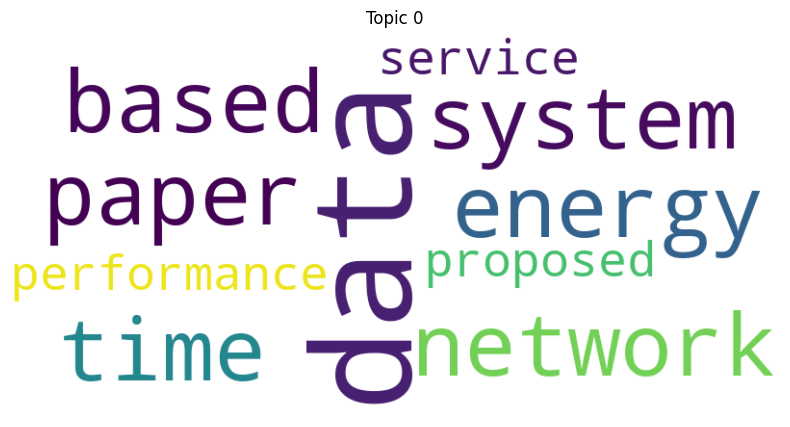

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


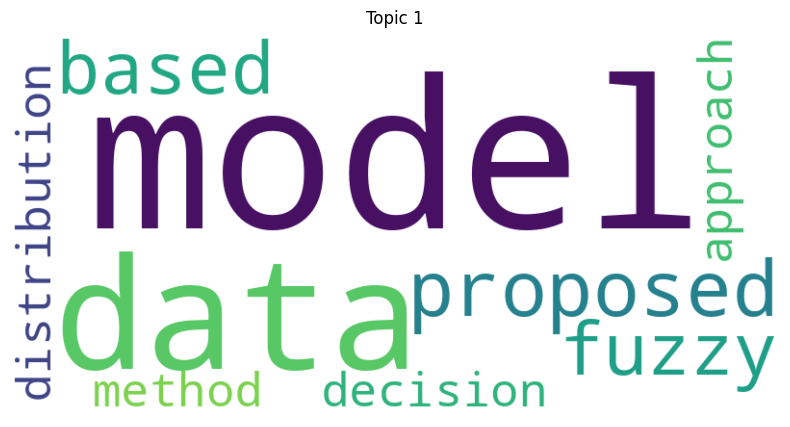

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


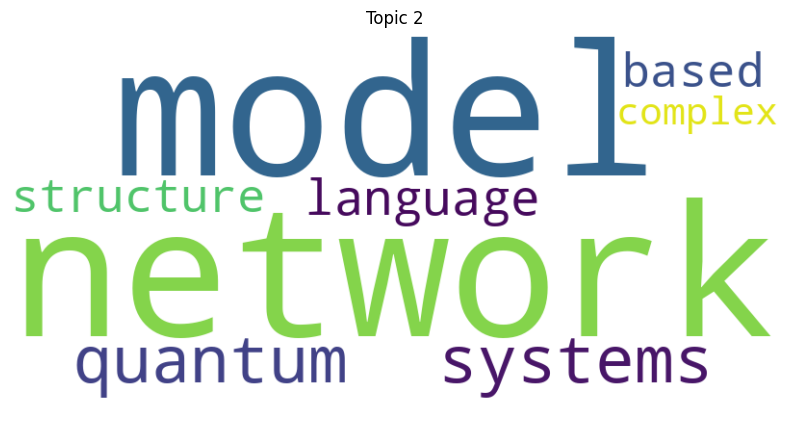

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


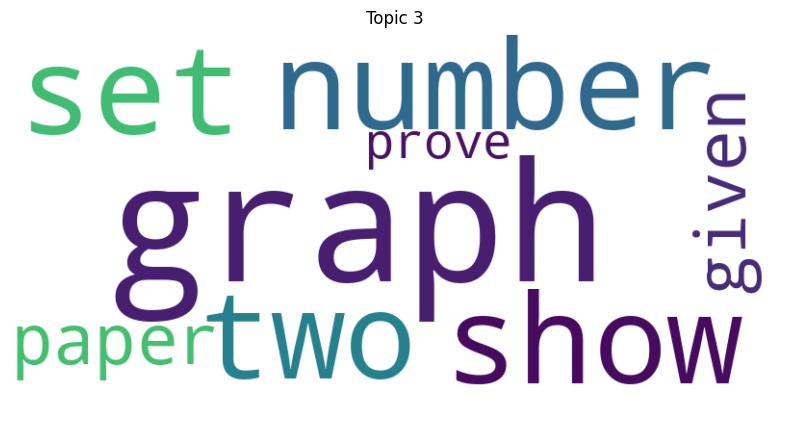

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


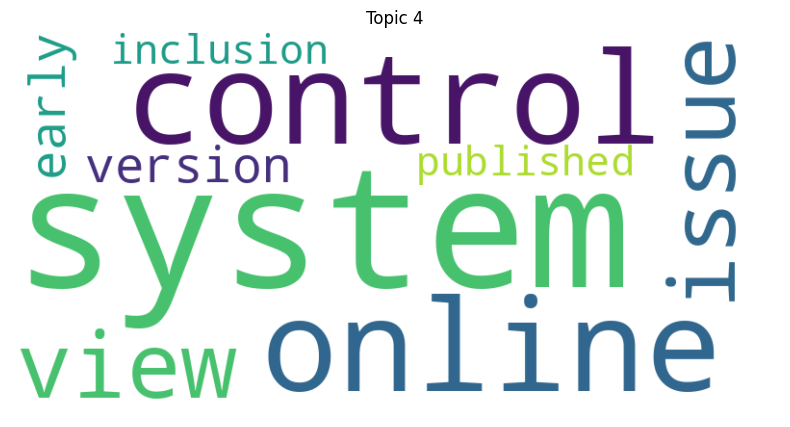

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


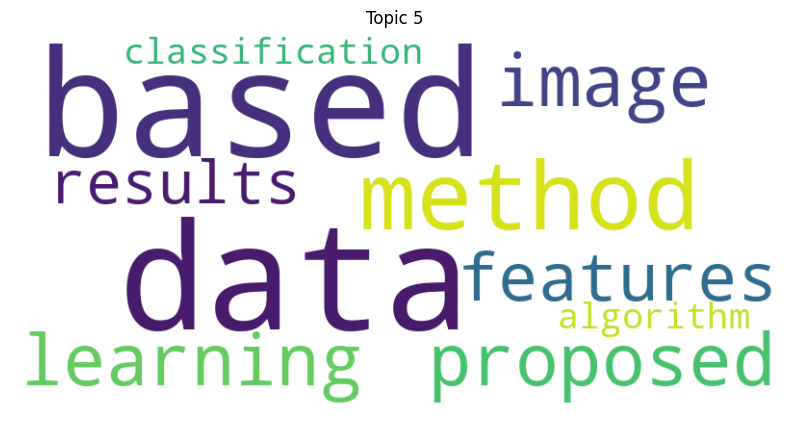

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


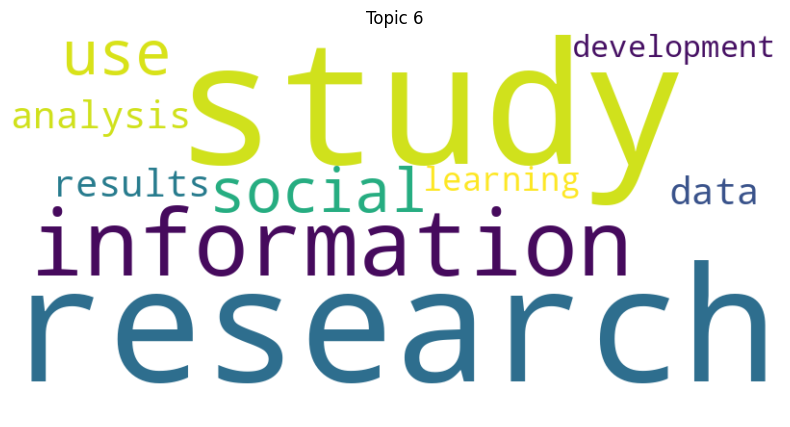

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


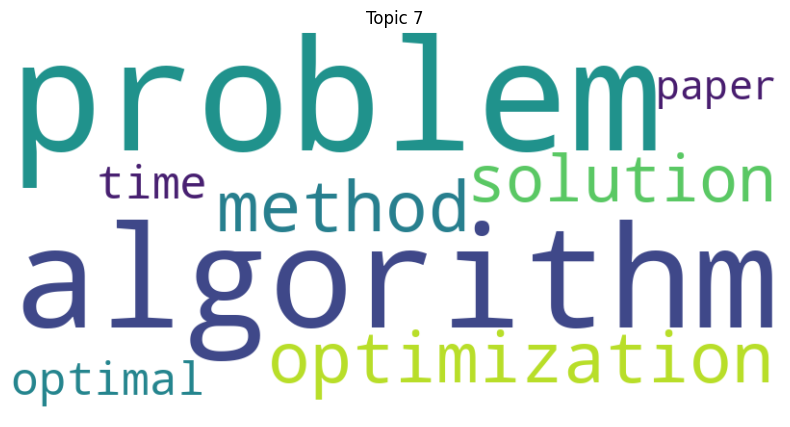

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


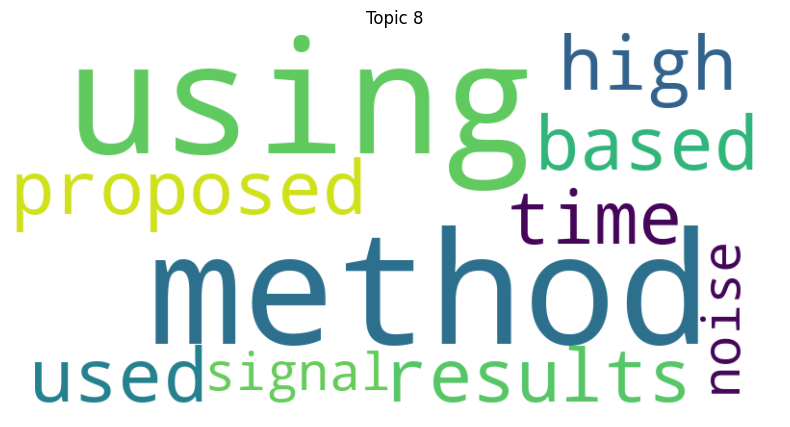

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


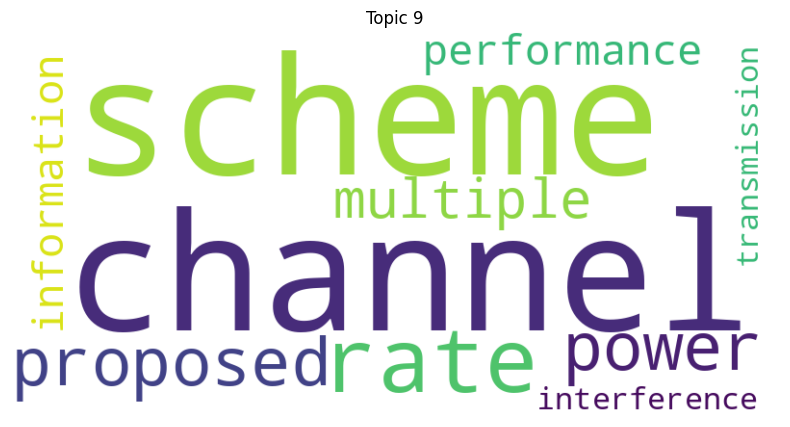

In [ ]:
#visluation des mots les plus fréquents pour chaque cluster
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# On groupe les données par la colonne Topic_Num
grouped = sent_topics_sorteddf.groupby('Topic_Num')

# On parcourt chaque groupe et on crée un nuage de mots pour chaque groupe
for name, group in grouped:
    # On combine tous les mots clés pour ce groupe en une seule chaîne de caractères
    keywords = ' '.join(group['Keywords'])
    
    # On crée un objet WordCloud avec les paramètres de notre choix
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(keywords)
    
    # On affiche le nuage de mots pour cette catégorie
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Topic {}'.format(name))
    plt.show()


##les top 10 de mots les plus fréquents dans chaque topic

In [ ]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.collocations import TrigramCollocationFinder

# On initialise le module NLTK
nltk.download('punkt')

# On groupe les données par la colonne Topic_Num
grouped = sent_topics_sorteddf.groupby('Topic_Num')

# On parcourt chaque groupe et on extrait les 10 mots les plus fréquents pour chaque groupe
for name, group in grouped:
    # On combine tous les textes pour ce groupe en une seule chaîne de caractères
    text = ' '.join(str(x) for x in group['Text'])
    
    # On retire la ponctuation du texte
    text_stop_punct = text.translate(str.maketrans('', '', string.punctuation))
    
    # On tokenise le texte en mots
    tokens = word_tokenize(text_stop_punct)
    
    # On calcule la fréquence de chaque mot
    fdist = FreqDist(tokens)
    
    # On affiche les 10 mots les plus fréquents pour ce groupe
    print('Topic', name, ':', [word for word in fdist.most_common(10) if word[0].isalpha()])


Topic 0 : [('handover', 6), ('mobility', 4), ('management', 3), ('wireless', 2), ('time', 2), ('mobile', 2), ('resourcefully', 2), ('service', 2), ('qos', 2), ('optimization', 2)]
Topic 1 : [('intuitionistic', 11), ('linguistic', 11), ('maclaurin', 7), ('symmetric', 7), ('mean', 7), ('uncertain', 5), ('two', 5), ('operators', 5), ('operator', 4), ('magdm', 3)]
Topic 2 : [('freese', 2), ('nation', 2), ('property', 2), ('fn', 2), ('sfn', 2), ('show', 1), ('boolean', 1), ('algebra', 1), ('strong', 1), ('thus', 1)]
Topic 3 : [('tensors', 14), ('cauchy', 10), ('hankel', 8), ('positive', 7), ('tensor', 6), ('generalized', 4), ('semi', 4), ('new', 3), ('even', 3), ('order', 3)]
Topic 4 : [('adaptive', 5), ('feedback', 5), ('fuzzy', 4), ('nonlinear', 4), ('systems', 4), ('nonstrict', 2), ('form', 2), ('output', 2), ('backstepping', 2), ('approach', 2)]
Topic 5 : [('data', 6), ('propose', 4), ('approach', 4), ('group', 4), ('ensemble', 4), ('concept', 3), ('learning', 3), ('large', 3), ('scale'

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##Collocation (bigramm,trigramm) de topic model

In [ ]:
import nltk
nltk.download('punkt')
from nltk.collocations import TrigramCollocationFinder, TrigramAssocMeasures,BigramAssocMeasures,BigramCollocationFinder

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def collocations(name_gram_measure,name_collocation):
  #collocations
  from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder,TrigramAssocMeasures
  # On groupe les données par la colonne Topic_Num
  grouped = sent_topics_sorteddf.groupby('Topic_Num')

  # On initialise la mesure de fréquence pour les collocations
  name_gram_measure = name_gram_measure
  # On parcourt chaque groupe et on extrait les 10 collocations les plus fréquentes pour chaque groupe
  for name, group in grouped:
      # On combine tous les textes pour ce groupe en une seule chaîne de caractères
      text = ' '.join(str(x) for x in group['Text'])
      #retrait des ponctuation
      text= text.translate(str.maketrans('', '', string.punctuation))
      # On tokenise le texte en mots
      tokens = word_tokenize(text)
      #On initialise le finder de collocations avec les tokens
      finder=name_collocation.from_words(tokens)
      # On calcule les collocations les plus fréquentes
      collocations= finder.nbest(name_gram_measure.raw_freq, 10)
      
      # On affiche les 10 collocations les plus fréquentes pour ce groupe
      print('Topic', name, ':', collocations)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Bigramm
bigram_measures=BigramAssocMeasures()
name_collocation=BigramCollocationFinder
res=collocations(bigram_measures,name_collocation)
print("*****************************")
res


Topic 0 : [('mobility', 'management'), ('handover', 'optimization'), ('access', 'technologies'), ('accessibility', 'available'), ('achieves', 'qos'), ('addition', 'dynamic'), ('adopted', 'provide'), ('also', 'integrated'), ('anytime', 'efficient'), ('anywhere', 'anytime')]
Topic 1 : [('maclaurin', 'symmetric'), ('symmetric', 'mean'), ('intuitionistic', 'linguistic'), ('intuitionistic', 'uncertain'), ('uncertain', 'linguistic'), ('linguistic', 'maclaurin'), ('linguistic', 'environment'), ('aggregating', 'intuitionistic'), ('aggregation', 'operators'), ('linguistic', 'information')]
Topic 2 : [('freese', 'nation'), ('nation', 'property'), ('algebra', 'freese'), ('along', 'way'), ('answering', 'question'), ('boolean', 'algebra'), ('elementary', 'submodels'), ('fn', 'sfn'), ('fn', 'strong'), ('heindorf', 'shapiro')]
Topic 3 : [('cauchy', 'tensors'), ('generalized', 'cauchy'), ('hankel', 'tensor'), ('hankel', 'tensors'), ('positive', 'semi'), ('even', 'order'), ('cauchy', 'hankel'), ('prove

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Trigramm TrigramCollocationFinder,TrigramAssocMeasures
trigram_measures=TrigramAssocMeasures()
name_collocation=TrigramCollocationFinder
res=collocations(trigram_measures,name_collocation)
print("*****************************")
res


Topic 0 : [('access', 'technologies', 'increasing'), ('accessibility', 'available', 'wireless'), ('achieves', 'qos', 'guarantee'), ('addition', 'dynamic', 'mobility'), ('adopted', 'provide', 'associated'), ('also', 'integrated', 'proposed'), ('anytime', 'efficient', 'handover'), ('anywhere', 'anytime', 'efficient'), ('application', 'becomes', 'essential'), ('applications', 'proxy', 'mipv')]
Topic 1 : [('maclaurin', 'symmetric', 'mean'), ('intuitionistic', 'uncertain', 'linguistic'), ('linguistic', 'maclaurin', 'symmetric'), ('intuitionistic', 'linguistic', 'environment'), ('intuitionistic', 'linguistic', 'maclaurin'), ('operator', 'weighted', 'intuitionistic'), ('uncertain', 'linguistic', 'maclaurin'), ('aggregating', 'intuitionistic', 'linguistic'), ('aggregating', 'intuitionistic', 'uncertain'), ('aggregation', 'operators', 'developed')]
Topic 2 : [('freese', 'nation', 'property'), ('algebra', 'freese', 'nation'), ('along', 'way', 'produce'), ('answering', 'question', 'heindorf'), ('

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import spacy
from gensim import corpora

# Charger le modèle de langue de spacy
nlp = spacy.load("en_core_web_sm")

# Définir la fonction de prétraitement
def preprocess(text):
    doc = nlp(text)
    # Filtrer les mots vides, les nombres et les ponctuations
    tokens = [remove_stopwords(" ".join(simple_preprocess(doc))) for doc in corpus]
    return tokens

# Transformer le corpus en format gensim
corpus_gensim =data_words
dictionary = corpora.Dictionary(corpus_gensim)
corpus_bow = [dictionary.doc2bow(doc) for doc in corpus_gensim]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Chargement des données


# Vectorisation des données
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)

# Clustering avec l'algorithme k-means
kmeans = KMeans(n_clusters=10, random_state=0).fit(tfidf)

# Affichage des résultats
data=df.copy()
data['cluster'] = kmeans.labels_
print(data.groupby('cluster').size().reset_index(name='counts'))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   cluster  counts
0        0    1084
1        1     503
2        2     948
3        3     660
4        4    5178
5        5    1049
6        6    1204
7        7    1458
8        8     474
9        9     178


# TP3 Graphe

In [ ]:
# df pour fomer le  graphe
df_g=df[["title","abstract","authors"]]


In [ ]:
from IPython.display import SVG
from tqdm import tqdm
#import spacy
import sknetwork
import networkx as nx
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from node2vec import Node2Vec
from pyvis.network import Network
from scipy import spatial 
from scipy.sparse.csr import csr_matrix
from scipy.spatial import distance
from sklearn.cluster import KMeans, SpectralClustering, MiniBatchKMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sknetwork.visualization import svg_graph
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from tqdm import tqdm
from wordcloud import WordCloud


<ipython-input-24-d014bc3d1105>:11: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  from scipy.sparse.csr import csr_matrix


In [ ]:
from itertools import chain
all_authors = list(chain(*df['authors']))

In [ ]:
len(all_authors)
all_authors[:5]

['Alexandr Andoni',
 'Huy L. Nguyêݱn',
 'Malte Probst',
 'Franz Rothlauf',
 'Jörn Grahl']

In [ ]:
# on construis uns liste e noms propre des auteurs et on supprime les listes vides
import spacy
nlp = spacy.load("en_core_web_sm")
df_gg=df.iloc[:1000,:]
list_text = df_gg['abstract']
list_np = [noms_propres for texte in tqdm(list_text) 
            for noms_propres in [ent.text for ent in nlp(str(texte)).ents
                                if ent.label_ == "PERSON"]
            if noms_propres] 

100%|██████████| 1000/1000 [00:36<00:00, 27.48it/s]


In [ ]:
print("Liste des noms propres : ", list_np)

Liste des noms propres :  ['Chan', 'Chan', 'Restricted Boltzmann Machines', 'Hilbert', 'Fourier Transform', 'Krylov', 'Krylov', 'Krylov', 'Krylov', 'Krylov', 'Krylov', 'G.', 'Reginski', 'Fourier', 'Nelson', 'Gini', 'Monte Carlo', 'Monte Carlo', 'Maruyama', 's\\text{-}sat(Q_n', '\\frac{1}{4}$. Further', 's\\text{-}sat(Q_n', 'Markov', 'Markov', 'Devaney', 'Devaney', 'Nelson', 'Granas', 'Heuer', 'Sobolev', 'Ras Al Khaimah', 'Poisson', 'Nash', 'br-ELM', 'Gramicidin-A', 'Kalman', 'Kalman', 'Chen', 'Ebert', 'Strack', 'Hadamard', 'v)$$dG(u', 'd_G(u', 'd_G(u', 'X. Li', '\\mathit{SQ}_{\\mathrm{Abel}}(n,\\sigma)$', 'Parikh', 'Parikh', 'Timed Automata', 'Monte Carlo', 'Higashitani', 'Maclagan', 'Hilbert', 'Ehrhart', 'O(N^{\\frac{42}{23}})$', 'Gordan', 'Hoffman', 'UAV', 'σ  s', 'σ  s u m       ', 'Gath-Geva', 'Port Tampa', 'Miller', 'Caimo', 'Friel', 'f(x^1', 'L_n(X_n,\\Phi', 'Sobolev', 'W^\\gamma _q({\\mathbb', '{p,\\theta', '\\beta', '{p,\\theta', 'Hilbert', 'Gross', 'E. D’yakonov', 'Karush', 'T

In [ ]:
len(list_np)

3456

In [ ]:
list_np=all_authors
list_np=list_np[:1000]

In [ ]:
# documents  contenant des noms propres
#list_np=all_authors
id_nv = np.where(list_np)[0]
array_np = np.array(list_np)
liste_nv = array_np[id_nv]
print( "Nombre de authors retenus : ", len(liste_nv))

Nombre de authors retenus :  678


In [ ]:
#on crée la matrice adjacence
size = liste_nv.shape[0]
matrice = np.zeros((size,size))
for i in tqdm(range(0,size)) :
  for j in range(0,size) :
    number = len(list(set(liste_nv[i]) & set(liste_nv[j])))
    matrice[i][j] = 1 if (number>=1 and i!=j) else 0 

100%|██████████| 678/678 [00:01<00:00, 517.20it/s]


In [ ]:
indice = np.where(np.sum(matrice,axis=0)>20)[0]
temp = matrice[indice,]
adjacence = temp[:,indice]
adjacence = csr_matrix(adjacence)
image = svg_graph(adjacence)
SVG(image)

In [ ]:
#stats du graphe
"""
import networkx as nx
# créer un graphe à partir de la matrice d'adjacence
G = nx.from_numpy_matrix(adjacence)
G=nx.Graph(adjacence)
# calculer des statistiques sur le graphe
degree_dist = nx.degree_histogram(G)
print("degree_dist :", degree_dist)
#graph_width = nx.diameter(G) #erreur
graph_density = nx.density(G)
print("graph_density: ",graph_density)
clustering_coeffs = nx.clustering(G)
print("clustering_coeffs: ",clustering_coeffs)
"""

degree_dist : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
#clustering spectral
clustering_graph = SpectralClustering(n_clusters=32).fit_predict(adjacence)
clustering_graph

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[1.99065022e-09 4.49247991e-07 6.25409337e-07 5.22395811e-07
 8.12560779e-07 1.62726179e-06 9.41472660e-07 1.32183622e-06
 1.62838354e-06 1.20304522e-06 1.03559917e-06 8.58025702e-07
 1.08355540e-06 2.30761362e-06 1.86805513e-06 2.70289524e-06
 1.84438817e-06 1.03384526e-06 1.48054105e-06 3.61263780e-06
 3.50762721e-06 2.04363425e-06 1.47196998e-06 4.21432276e-06
 1.60091375e-06 4.51850592e-06 6.32041075e-06 1.27506512e-05
 5.57663402e-06 4.71863873e-06 8.11668948e-06 1.44826282e-05
 5.33223106e-06]
not reaching the requested tolerance 1.0058283805847168e-05.
Use iteration 1980 instead with accu

array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,  2,
       30, 30, 30, 30, 27, 30, 30,  0, 30, 30,  0, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 18, 11, 30, 30, 30, 30, 30, 30, 13, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,  0, 30, 30,  9, 27,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 24, 30, 30,
       30, 30, 30, 30, 30, 30, 25, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 16, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 20, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 29, 30, 22, 30, 30, 27, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 28, 30,  6, 30

In [ ]:
image = svg_graph(adjacence, labels=clustering_graph)
SVG(image)

In [ ]:
#clustering_graph1 = SpectralClustering(n_clusters=10).fit_predict(adjacence)
#clustering_graph1

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 0,

In [ ]:
image = svg_graph(adjacence, labels=clustering_graph1)
SVG(image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#on recupre sous node2vec
G = nx.Graph(adjacence)
rpt = Node2Vec(G, dimensions=128, walk_length=40, num_walks=100, workers=2)
NODE = rpt.fit()
NODE.wv.vectors

Computing transition probabilities:   0%|          | 0/675 [00:00<?, ?it/s]

array([[ 0.05921481,  0.1046778 , -0.06627554, ..., -0.1640846 ,
        -0.13024119, -0.09712514],
       [-0.18881424,  0.10807089,  0.07186929, ..., -0.09093406,
        -0.07339691, -0.14630479],
       [ 0.05414888,  0.13549615,  0.0234862 , ..., -0.00258928,
        -0.01079243, -0.0083506 ],
       ...,
       [-0.6226892 ,  0.47587082, -0.26188827, ..., -0.02876587,
        -0.19676846, -0.03139471],
       [-0.05375953, -0.34113228, -0.4343725 , ..., -0.4226243 ,
        -0.27572778, -0.3448299 ],
       [-0.385277  , -0.20510209,  0.11567547, ..., -0.3067317 ,
        -0.01014262, -0.17357193]], dtype=float32)

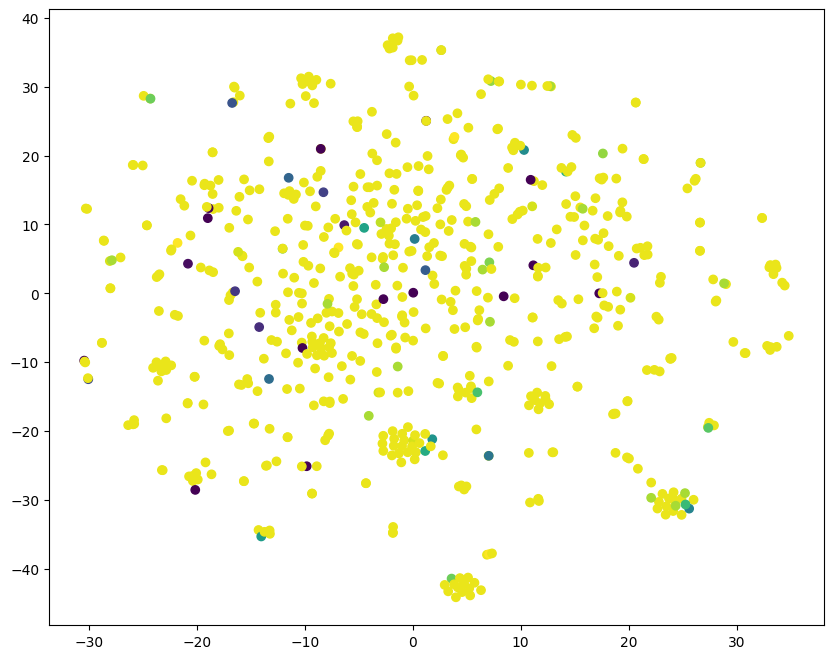

In [ ]:
#affichage sur TSNE
node_ids = NODE.wv.index_to_key
node_embeddings = NODE.wv.vectors
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)
alpha=0.9
plt.figure(figsize=(10,8))
plt.scatter(node_embeddings_2d[:,0],
                node_embeddings_2d[:,1],
                c=clustering_graph)

In [ ]:
#on utilise que les 1000 premiers artciles pour des raisons en  ressources en calcul limitées
df_gg=df_g.copy()
df_gg=df_gg.iloc[:1000,:]


In [ ]:
import networkx as nx

# Construction du graphe G
author_lists = df_gg['authors'].tolist()
G = nx.Graph()
for authors in author_lists:
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            G.add_edge(authors[i], authors[j])

# Suppression des nœuds non connectés
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Obtention de la matrice d'adjacence
adj_matrix = nx.to_numpy_matrix(G)

In [ ]:
# creation matrice adjcence et construction du graphe G
import networkx as nx
author_lists = df_gg['authors'].tolist()
G = nx.Graph()
G.add_node(i, abstract=df_gg['abstract'][i], title=df_gg['title'][i])
for authors in author_lists:
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            G.add_edge(authors[i], authors[j])

# Suppression des nœuds non connectés
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Obtention de la matrice d'adjacence
adj_matrix = nx.to_numpy_matrix(G)

NameError: ignored

In [ ]:
#stats
import networkx as nx

# créer un graphe à partir de la matrice d'adjacence
G = nx.from_numpy_matrix(adj_matrix)

# calculer des statistiques sur le graphe
degree_dist = nx.degree_histogram(G)
print("degree_dist :", degree_dist)
#graph_width = nx.diameter(G) #erreur
graph_density = nx.density(G)
print("graph_density: ",graph_density)
clustering_coeffs = nx.clustering(G)
print("clustering_coeffs: ",clustering_coeffs)


degree_dist : [0, 520, 802, 709, 413, 210, 85, 74, 39, 36, 35, 13, 1, 12, 1, 16, 0, 0, 2]
graph_density:  0.0010865250005223678
clustering_coeffs:  {0: 0, 1: 0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 0.3333333333333333, 10: 1.0, 11: 1.0, 12: 0, 13: 0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 0, 21: 0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 0, 26: 0.6, 27: 1.0, 28: 1.0, 29: 1.0, 30: 0.3333333333333333, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 0.3333333333333333, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0, 57: 1.0, 58: 1.0, 59: 1.0, 60: 1.0, 61: 1.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 1.0, 69: 1.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 1.0, 74: 1.0, 75: 1.0, 76: 1.0, 77: 1.0, 78: 1.0, 79: 1.0, 80: 1.0, 81: 1.0, 82: 1.0, 83: 1.0, 84: 1.0, 85: 1.0, 86: 1.0, 87: 1.0, 88: 1.0, 89: 1.0, 90: 1.0, 91: 1.0, 92

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


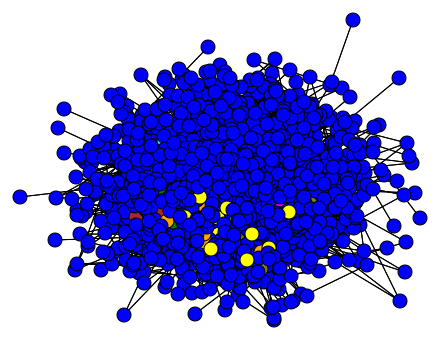

In [ ]:
#clustering spectral
import scipy.sparse as sp
adj=np.array(adj_matrix)
adj_sparse = sp.csr_matrix(adj)
clustering_graph = SpectralClustering(n_clusters=20).fit_predict(adj_sparse)

#affichage
image = svg_graph(adj_sparse, labels=clustering_graph)
SVG(image)

In [ ]:
#on recupre sous node2vec
G = nx.Graph(adj_sparse)
node2vec = Node2Vec(G, dimensions=128, walk_length=40, num_walks=100, workers=2)
NODE = node2vec.fit()
NODE.wv.vectors

Computing transition probabilities:   0%|          | 0/2968 [00:00<?, ?it/s]

array([[ 0.15482551, -0.5490978 ,  0.15607724, ...,  0.06706783,
        -0.52988285, -0.4424428 ],
       [-0.02565545, -0.37930092,  0.47558606, ..., -0.38199025,
        -0.5807151 , -0.92254096],
       [-0.13722852, -0.5515862 , -0.46766472, ...,  0.2784399 ,
         0.31351203, -0.42505783],
       ...,
       [ 0.22888254, -0.7566362 ,  0.0866461 , ..., -0.51205254,
        -0.88697493, -0.24233752],
       [ 0.18326262, -0.7043444 ,  0.02944303, ..., -0.6475244 ,
        -0.06946944, -0.17582321],
       [ 0.14629608, -0.5577945 , -0.3880957 , ..., -0.40325242,
        -0.4144351 , -1.0257473 ]], dtype=float32)

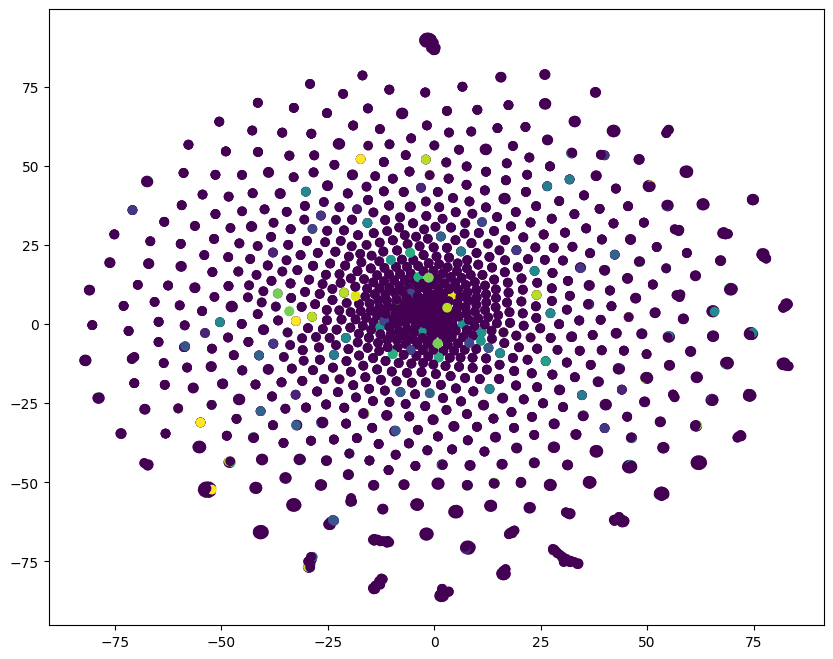

In [ ]:
#affichage avec TSNE
node_ids = NODE.wv.index_to_key
node_embeddings = NODE.wv.vectors
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)
alpha=0.9
plt.figure(figsize=(10,8))
plt.scatter(node_embeddings_2d[:,0],
                node_embeddings_2d[:,1],
                c=clustering_graph)

In [ ]:
data_g=df.explode("authors")
data_g=data_g.iloc[:10000,:]

# TP4 Bertopic 
[Bertopics](https://github.com/MaartenGr/BERTopic)

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import nltk
nltk.download('wordnet')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer

# Définir les stopwords supplémentaires à supprimer
CUSTOM_STOPWORDS = ["example", "stopword", "list"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'\n# Initialiser le lemmatizer\nlemmatizer = WordNetLemmatizer()\n\n# Fonction pour le prétraitement des données\ndef preprocess(text):\n    # Convertir le texte en une liste de tokens\n    tokens = simple_preprocess(text, deacc=True)\n    # Supprimer les stopwords\n    tokens = [token for token in tokens if token not in STOPWORDS and token not in CUSTOM_STOPWORDS]\n    # Lématiser les tokens\n    tokens = [lemmatizer.lemmatize(token) for token in tokens]\n    return tokens\n\n\nprocessed_corpus = [preprocess(document) for document in corpus]\n\n# Afficher le résultat\nprint(processed_corpus)\n'

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
"""
import itertools
processed_corpus = [preprocess(document) for document in corpus]
docs = list(itertools.chain.from_iterable(processed_corpus))
"""

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'\nimport itertools\nprocessed_corpus = [preprocess(document) for document in corpus]\ndocs = list(itertools.chain.from_iterable(processed_corpus))\n'

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

# Liste de textes
def stopWords(textes):
    # Stopwords en français
    stopwords_fr = set(stopwords.words('english'))

    # Liste des textes sans stopwords
    textes_sans_stopwords = []
    for texte in textes:
        mots = texte.split()
        mots_sans_stopwords = [mot for mot in mots if mot.lower() not in stopwords_fr]
        texte_sans_stopwords = " ".join(mots_sans_stopwords)
        textes_sans_stopwords.append(texte_sans_stopwords)

    return textes_sans_stopwords


#lemmatissation
def lemmatisation_docs(corpus):
# Définir la liste de documents
    documents =  corpus

    # Initialiser le lemmatiseur
    lemmatizer = WordNetLemmatizer()

    # Lemmatisation de chaque document individuellement
    lemmatized_documents = []
    for document in documents:
        # Tokenisation et tagging POS
        tokens = word_tokenize(document)
        pos_tags = nltk.pos_tag(tokens)
        
        # Lemmatisation
        lemmatized_tokens = []
        for token, tag in pos_tags:
            if tag.startswith('NN'):
                pos = 'n'
            elif tag.startswith('VB'):
                pos = 'v'
            else:
                pos = 'a'
            lemmatized_tokens.append(lemmatizer.lemmatize(token, pos))
        
        # Stockage du document lemmatisé dans la liste de documents lemmatisés
        lemmatized_documents.append(' '.join(lemmatized_tokens))
    return lemmatized_documents



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
corpus_stopWords=stopWords(corpus)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
corpus_lematizer=lemmatisation_docs(corpus_stopWords)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(f"lemmatisation: {len(corpus_stopWords)}")
print(f"lemmatisation: {len(corpus_lematizer)}")


lemmatisation: 12736
lemmatisation: 12736


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#docs
#documents
docs = corpus_lematizer

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import itertools
from bertopic import BERTopic

#model
model = BERTopic(min_topic_size=20,nr_topics="auto",calculate_probabilities=True)
# Entraîner le modèle
topics, _ = model.fit_transform(docs)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
valeurs_uniques = set(topics)
len(valeurs_uniques)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



73

In [ ]:
#Après avoir généré les sujets et leurs probabilités, nous pouvons accéder aux sujets fréquents qui ont été générés
model.get_topic_info()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic  Count                                     Name
0      -1   3971                -1_use_model_data_problem
1       0    831            0_image_feature_method_object
2       1    683          1_inclusion_publish_record_view
3       2    583  2_equation_numerical_method_convergence
4       3    560                3_graph_vertex_edge_every
..    ...    ...                                      ...
68     67     23             67_radar_signal_doa_waveform
69     68     22     68_eigenvalue_matrix_hermitian_feast
70     69     21         69_word_string_sequence_alphabet
71     70     21    70_epidemic_individual_spread_contact
72     71     20         71_eeg_seizure_artifact_epilepsy

[73 rows x 3 columns]

In [ ]:
#La -1rubrique fait référence à tous les documents aberrants 
#et est généralement ignorée. Examinons ensuite le sujet le plus fréquemment généré
model.get_topic(78)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



False

In [ ]:
#En utilisant .get_document_info, nous pouvons également extraire des informations au niveau du document, telles que les sujets
# correspondants, les probabilités, s'il s'agit de documents représentatifs d'un sujet, etc.
docs = corpus_stopWords
model.get_document_info(docs)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Document  Topic  \
0      article show compute width dynamic set lowdime...     -1   
1      estimation distribution algorithms edas requir...     -1   
2      traditional methods video summarization design...      0   
3      decision tree important method induction resea...     -1   
4      fullreference image quality assessment friqa t...      0   
...                                                  ...    ...   
12731  interactive argtrust application decisionmakin...     12   
12732  parametrically guided kernel smoother promisin...      9   
12733  supply chain planning one important processes ...     20   
12734  increasing studies marketing distribution chan...     20   
12735  designing deploying programming courses undoub...     18   

                                            Name  \
0                      -1_use_model_data_problem   
1                      -1_use_model_data_problem   
2                  0_image_feature_method_object   
3                      -1_use_model_data_problem   
4                  0_image_feature_method_object   
...                                          ...   
12731  12_fuzzy_decision_operator_intuitionistic   
12732  9_estimator_distribution_model_estimation   
12733              20_price_retailer_firm_supply   
12734              20_price_retailer_firm_supply   
12735            18_student_learn_course_teacher   

                                             Top_n_words  Probability  \
0      use - model - data - problem - system - propos...     0.713889   
1      use - model - data - problem - system - propos...     0.045918   
2      image - feature - method - object - propose - ...     0.141240   
3      use - model - data - problem - system - propos...     0.082478   
4      image - feature - method - object - propose - ...     0.110284   
...                                                  ...          ...   
12731  fuzzy - decision - operator - intuitionistic -...     0.027825   
12732  estimator - distribution - model - estimation ...     0.133027   
12733  price - retailer - firm - supply - consumer - ...     0.195230   
12734  price - retailer - firm - supply - consumer - ...     0.214029   
12735  student - learn - course - teacher - learner -...     1.000000   

       Representative_document  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...                        ...  
12731                    False  
12732                    False  
12733                    False  
12734                    False  
12735                    False  

[12736 rows x 6 columns]

## exploitation resultats BERTopic

In [ ]:
model.visualize_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Visualiser les termes du sujet
model.visualize_barchart()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#filtrer les Topics
df_result_bertopic=model.get_document_info(docs)
df_filtered = df_result_bertopic.loc[df_result_bertopic['Topic'] == 8]
df_filtered

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Document  Topic  \
25     quest model able explain describe analyze simu...      8   
44     paper establishes consistency family graphcutb...      8   
130    betweenness closeness metrics widely used metr...      8   
150    online communities play increasingly important...      8   
187    introduce data reduction rules obtaining appro...      8   
...                                                  ...    ...   
12538  weakness nexthop routing following link router...      8   
12572  information overload long studied phenomenon c...      8   
12629  mobile social networks msns facilitate connect...      8   
12727  research studied assimilation process technolo...      8   
12730  family clustering problems given set objects v...      8   

                                  Name  \
25     8_network_social_community_node   
44     8_network_social_community_node   
130    8_network_social_community_node   
150    8_network_social_community_node   
187    8_network_social_community_node   
...                                ...   
12538  8_network_social_community_node   
12572  8_network_social_community_node   
12629  8_network_social_community_node   
12727  8_network_social_community_node   
12730  8_network_social_community_node   

                                             Top_n_words  Probability  \
25     network - social - community - node - graph - ...     0.193860   
44     network - social - community - node - graph - ...     0.076573   
130    network - social - community - node - graph - ...     0.527463   
150    network - social - community - node - graph - ...     0.071386   
187    network - social - community - node - graph - ...     1.000000   
...                                                  ...          ...   
12538  network - social - community - node - graph - ...     0.147065   
12572  network - social - community - node - graph - ...     0.160857   
12629  network - social - community - node - graph - ...     0.069883   
12727  network - social - community - node - graph - ...     0.095362   
12730  network - social - community - node - graph - ...     0.062092   

       Representative_document  
25                       False  
44                       False  
130                      False  
150                      False  
187                      False  
...                        ...  
12538                    False  
12572                    False  
12629                    False  
12727                    False  
12730                    False  

[266 rows x 6 columns]

In [ ]:
df_result_bertopic.Topic

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0        -1
1        -1
2         0
3        -1
4         0
         ..
12731    12
12732     9
12733    20
12734    20
12735    18
Name: Topic, Length: 12736, dtype: int64

In [ ]:
classes = []
list_classes=df_result_bertopic["Name"].tolist()
for i, doc in enumerate(docs):
    # Get the class label for the i-th instance
    class_label = list_classes[i]
    # Append the class label to the corresponding document in `classes`
    classes.append(class_label)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#prediction du cluster d'un documents
new_doc=["Healthcare delivery requires the support of new technologies like Artificial Intelligence (AI), Internet of Things (IoT), Big Data and Machine Learning to fight and look ahead against the new diseases. We aim to review the role of AI as a decisive technology to analyze, prepare us for prevention and fight with COVID-19 (Coronavirus) and other pandemics"]
new_doc=["Artificial neural networks have been applied to problems ranging from speech recognition to prediction of protein secondary structure, classification of cancers and gene prediction. How do they work and what might they be good for?"]
new_doc = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in new_doc]
new_doc_stopword=stopWords(corpus)
new_doc_lemmatizer=lemmatisation_docs(new_doc_stopword)
model.transform([new_doc_lemmatizer])


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



([7],
 array([[0.00654631, 0.00909576, 0.00654672, 0.00280654, 0.02225508,
         0.00790961, 0.00301459, 0.01420714, 0.01021349, 0.00437477,
         0.00247253, 0.00893067, 0.00377091, 0.00209566, 0.00347222,
         0.00421042, 0.00355256, 0.00186737, 0.00271316, 0.00245493,
         0.00385329, 0.00317289, 0.00297937, 0.00331361, 0.00269697,
         0.00297301, 0.00302345, 0.00160309, 0.00302735, 0.00357674,
         0.00511913, 0.00236583, 0.00318297, 0.00326914, 0.00302882,
         0.00290862, 0.00277512, 0.00373392, 0.00203827, 0.00335834,
         0.00337292, 0.00275882, 0.0026304 , 0.00251092, 0.00374113,
         0.002478  , 0.00309398, 0.00333837, 0.00242617, 0.00300512,
         0.00522249, 0.0029777 , 0.00317924, 0.0035498 , 0.00339722,
         0.00208528, 0.00452762, 0.00518805, 0.00283633, 0.00329588,
         0.00424126, 0.00283256, 0.0026642 , 0.00303907, 0.00429133,
         0.00309001, 0.00299774, 0.00355915, 0.00339668, 0.0033361 ,
         0.0040078 , 0.00262

In [ ]:
#Visualiser les termes du sujet
model.visualize_heatmap()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
requete="artificial intelligence"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# moteur de recherche ou trouver les  docs qui sont similaires a la requete de recherche et leur topics
requete="graph learning"
Topics_bert, similarity = model.find_topics(requete, top_n=5)
df_bertopic=model.get_document_info(docs)
df_requete=df_bertopic[df_bertopic["Topic"].isin(Topics_bert)]
df_requete[df_requete.Probability>0.70]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Document  Topic  \
187    introduce data reduction rules obtaining appro...      8   
258    traditional prototypebased clustering methods ...     37   
297    aesthetics often used measure layout quality g...     39   
416    important source high clustering coefficient r...      8   
524    khypergraph matching given collection sets siz...      8   
...                                                  ...    ...   
12294  use internet among teenagers increased recent ...      8   
12304  several graph libraries developed past decades...      8   
12385  paper studies approximation algorithm maximum ...      8   
12431  total chromatic number graph gg denoted chi gg...      3   
12595  propose new relational clustering approach cal...     37   

                                         Name  \
187           8_network_social_community_node   
258      37_cluster_clustering_algorithm_data   
297    39_visualization_data_visual_technique   
416           8_network_social_community_node   
524           8_network_social_community_node   
...                                       ...   
12294         8_network_social_community_node   
12304         8_network_social_community_node   
12385         8_network_social_community_node   
12431               3_graph_vertex_edge_every   
12595    37_cluster_clustering_algorithm_data   

                                             Top_n_words  Probability  \
187    network - social - community - node - graph - ...          1.0   
258    cluster - clustering - algorithm - data - fuzz...          1.0   
297    visualization - data - visual - technique - vi...          1.0   
416    network - social - community - node - graph - ...          1.0   
524    network - social - community - node - graph - ...          1.0   
...                                                  ...          ...   
12294  network - social - community - node - graph - ...          1.0   
12304  network - social - community - node - graph - ...          1.0   
12385  network - social - community - node - graph - ...          1.0   
12431  graph - vertex - edge - every - number - color...          1.0   
12595  cluster - clustering - algorithm - data - fuzz...          1.0   

       Representative_document  
187                      False  
258                      False  
297                      False  
416                      False  
524                      False  
...                        ...  
12294                    False  
12304                    False  
12385                    False  
12431                    False  
12595                    False  

[175 rows x 6 columns]

In [ ]:
#RECHERCHE DOCUMENTAIRE
model.find_topics("artificial intelligence")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



([14, 59, 57, 40, 15],
 [0.5972546150989897,
  0.5905982165134329,
  0.5721633878189069,
  0.5671571805876736,
  0.5644992109136667])

###Visualiser la hiérarchie des documents des resultast bertopic

In [ ]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(docs, show_progress_bar=False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# visulaier
hierarchical_topics = model.hierarchical_topics(docs)
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
model.visualize_hierarchical_documents(docs, hierarchical_topics, reduced_embeddings=reduced_embeddings)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig =model.visualize_hierarchical_documents(docs, hierarchical_topics, reduced_embeddings=reduced_embeddings)
fig.write_html(url+"/hierarchie_topic.html") #sauvegarde dons mon environnement de travail

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



###Visualiser la hiérarchie des topics des resultast bertopic

In [ ]:
  # Extraire  la hierarchie des topics (sujets)
hierarchical_topics =model.hierarchical_topics(docs)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

100%|██████████| 71/71 [00:00<00:00, 125.97it/s]


In [ ]:
 # Visualiser leurs representations
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scip

In [ ]:
#sauvegarde en html
fig =model.visualize_hierarchy()
fig.write_html(url+"/hierarchie_topic.html")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scip

In [ ]:
!pip install node2vec

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_gg=df_g.copy()
df_gg=df_gg.iloc[:1000,:]
#df_gg = df_gg.reset_index(drop=True)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_gg

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



title  \
0               Width of Points in the Streaming Model   
1    Scalability of using Restricted Boltzmann Mach...   
2    Multi-view Metric Learning for Multi-view Vide...   
3    A New Method for Classification of Datasets fo...   
4    Full-reference image quality assessment by com...   
..                                                 ...   
995       A Laplace Operator on Semi-Discrete Surfaces   
996  On basic chordal graphs and some of its subcla...   
997  Reference points in revenue sharing contracts—...   
998  A Method for Metric Learning with Multiple-Ker...   
999  Compensating for Tissue Changes in an Ultrason...   

                                              abstract  \
0    In this article, we show how to compute the wi...   
1    Estimation of Distribution Algorithms (EDAs) r...   
2    Traditional methods on video summarization are...   
3    Decision tree is an important method for both ...   
4    Full-reference image quality assessment (FR-IQ...   
..                                                 ...   
995  This paper studies a Laplace operator on semi-...   
996  Basic chordal graphs arose when comparing cliq...   
997  Coordinating supply chains is an important goa...   
998  Distance metric learning is rather important f...   
999  Ultrasonic power transfer using piezoelectric ...   

                                               authors  
0                    [Alexandr Andoni, Huy L. Nguyêݱn]  
1           [Malte Probst, Franz Rothlauf, Jörn Grahl]  
2    [Linbo Wang, Xianyong Fang, Yanwen Guo, Yanwei...  
3    [Singh Vijendra, Hem Jyotsana Parashar, Nisha ...  
4                  [Ashirbani Saha, Q. M. Jonathan Wu]  
..                                                 ...  
995                                    [Wolfgang Carl]  
996                 [Pablo De Caria, Marisa Gutierrez]  
997         [Michael Becker-Peth, Ulrich W. Thonemann]  
998  [Xiao Lu, Yaonan Wang, Xuanyu Zhou, Zhigang Ling]  
999  [Hugo Vihvelin, Jeffrey R. Leadbetter, Manohar...  

[1000 rows x 3 columns]

In [ ]:
import networkx as nx

# Construction du graphe G
author_lists = df_gg['authors'].tolist()
G = nx.Graph()
for authors in author_lists:
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            G.add_edge(authors[i], authors[j])

# Suppression des nœuds non connectés
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# Obtention de la matrice d'adjacence
adj_matrix = nx.to_numpy_matrix(G)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
adj_matrix

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



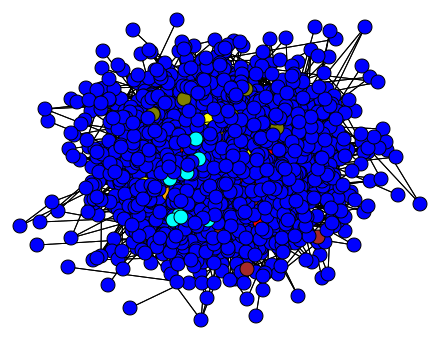

In [ ]:
#clustering
import scipy.sparse as sp
adj=np.array(adj_matrix)
adj_sparse = sp.csr_matrix(adj)
clustering_graph = SpectralClustering(n_clusters=20).fit_predict(adj_sparse)

#affichage
image = svg_graph(adj_sparse, labels=clustering_graph)
SVG(image)